# **Week 4: NLP Disaster Tweets Kaggle Mini-Project**
***
## **Overview**

Twitter has become an important communication channel in times of emergency.

The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).

In this competition, you’re challenged to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t.

(Please refer to https://www.kaggle.com/competitions/nlp-getting-started/overview for additional information about this dataset.)

***
## **Step 0 Import Libraries and Load Data**

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('nlp-getting-started/train.csv',usecols=['id','text','target'])
test = pd.read_csv('nlp-getting-started/test.csv',usecols=['id','text'])

***
## **Step 1 Brief Description**

#### **1.1 Problem**

- Use **Natural Language Processing (NLP)** techniques to predict whether a tweet is about a real disaster or not:

    - `target=1`: The tweet **is** related to a real disaster.
    - `target=0`: The tweet **is not** related to a disaster.

#### **1.2 Data**
- The **`train.csv`** file contains **7,613** rows and **3** columns:
  
    - `id`: A unique identifier assigned to each tweet.
  
    - `text`: The plain text content of the tweet.
  
    - `target`: A label indicating whether the tweet is about a real disaster (1) or not (0).
  
    - `keyword` and `location`: excluded due to missing values as stated on the website.

- Additionally, the test.csv file contains **3,263** rows. However, the test data does not include the target column, as it is meant for predictions. Together, these datasets form the foundation for a **binary classification** task in NLP.

In [3]:
# Check the dimensions of train and test datasets
print(f"Train dataset: {train.shape[0]} rows, {train.shape[1]} columns")
print(f"Test dataset: {test.shape[0]} rows, {test.shape[1]} columns")

Train dataset: 7613 rows, 3 columns
Test dataset: 3263 rows, 2 columns


In [4]:
# Have a look at the format
train.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
# Have a look at the format
test.head()

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan


***
## **Step 2 EDA**

#### **2.1 Check for Missing Values**
- There seems to be **no null values** or **NA** across the columns.

In [6]:
# Check for missing values
print(train.isnull().sum())
print("-" * 15)
print(train.isnull().sum())
print("-" * 15)

id        0
text      0
target    0
dtype: int64
---------------
id        0
text      0
target    0
dtype: int64
---------------


***
#### **2.2 Text Cleaning**

- **Purpose**: Cleaning the raw tweet text and applies stemming to standardize word forms.

    - **Removal**:
      
      - **URL**: Eliminates any URLs from the tweet text.
      - **Non-Alphabetic Character**: Strips out numbers, punctuation, and special characters.
      - **Stopword**: Removes common but uninformative words like "and," "the," and "is."
        <br><br>
    - **Tokenization & Stemming**: Splits text into individual words and reduces words to their root forms (e.g., "running" → "run").

In [7]:
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [8]:
# Load stopword list and stemmer
stop = set(stopwords.words('english'))
snow_stemmer = SnowballStemmer(language='english')

# Define a text cleaning function
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize, remove stopwords, and apply stemming
    words = [snow_stemmer.stem(word) for word in text.split() if word.lower() not in stop]
    # Combine words back into a single string
    return ' '.join(words)

# Apply cleaning and stemming to the text data
train['cleaned_text'] = train['text'].apply(clean_text)
test['cleaned_text'] = test['text'].apply(clean_text)

# Print original text
print("\n" + "Original Text:")
print(train['text'].head())
print("-"*55 + "\n")

# Print cleaned and stemmed text
print("Cleaned Text:")
print(train['cleaned_text'].head())
print("-" * 55)


Original Text:
0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object
-------------------------------------------------------

Cleaned Text:
0            deed reason earthquak may allah forgiv us
1                 forest fire near la rong sask canada
2    resid ask shelter place notifi offic evacu she...
3          peopl receiv wildfir evacu order california
4    got sent photo rubi alaska smoke wildfir pour ...
Name: cleaned_text, dtype: object
-------------------------------------------------------


***
#### **2.3 Visualizations**

- **Target Distribution**:

    - **Non-Disaster**: **4,342** tweets **(57%)**
    - **Disaster**: **3,271** tweets **(43%)**
    - The dataset is **slightly imbalanced**, but the imbalance is minor, so additional handling is unnecessary.

In [9]:
from matplotlib.colors import to_rgba

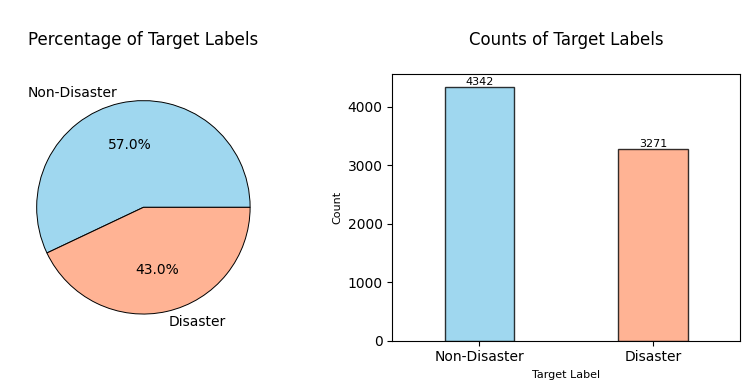

In [10]:
# Count the number of 0s and 1s in the 'target' column
counts = train['target'].value_counts()

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Create a mapping for the labels: 0 => "Non-Disaster", 1 => "Disaster"
label_mapping = {0: 'Non-Disaster', 1: 'Disaster'}
mapped_labels = [label_mapping[label] for label in counts.index]

# Define colors with transparency
colors = [to_rgba('skyblue', alpha=0.8), to_rgba('lightsalmon', alpha=0.8)]

# 1. Pie chart
axes[0].pie(
    counts.values,
    labels=mapped_labels,
    autopct='%1.1f%%',
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.7}
)
axes[0].set_title('\nPercentage of Target Labels\n', fontsize=12)

# 2. Bar chart
bars = axes[1].bar(mapped_labels, counts.values, color=['skyblue', 'lightsalmon'], edgecolor='black', alpha=0.8, width=0.4)
axes[1].set_xlabel('Target Label', fontsize=8)
axes[1].set_ylabel('Count', fontsize=8)
axes[1].set_title('\nCounts of Target Labels\n', fontsize=12)
axes[1].set_xlim(-0.5, 1.5)

# Annotate each bar with its count value
for bar in bars:
    height = bar.get_height()
    axes[1].text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.tight_layout()
plt.show()

***
- **Tweet Length Distribution**:
  
  - **Word Count Distribution**:
    - The word count distribution for both the training and testing datasets is relatively similar.
    - Most tweets contain between 5 to 15 words, with the distribution is slightly left-skewed.<br><br>

  - **Character Length Distribution**:
    - The character length distribution also shows similar patterns for the training and testing datasets.
    - Most tweets have a character count ranging between 20 to 80, with a peak around 40–50 characters.<br><br>

  - **Summary**: The word and character count distributions for the training and testing datasets are consistent, suggesting that the datasets are comparable in terms of tweet length. This is beneficial for ensuring the model generalizes well across both datasets.

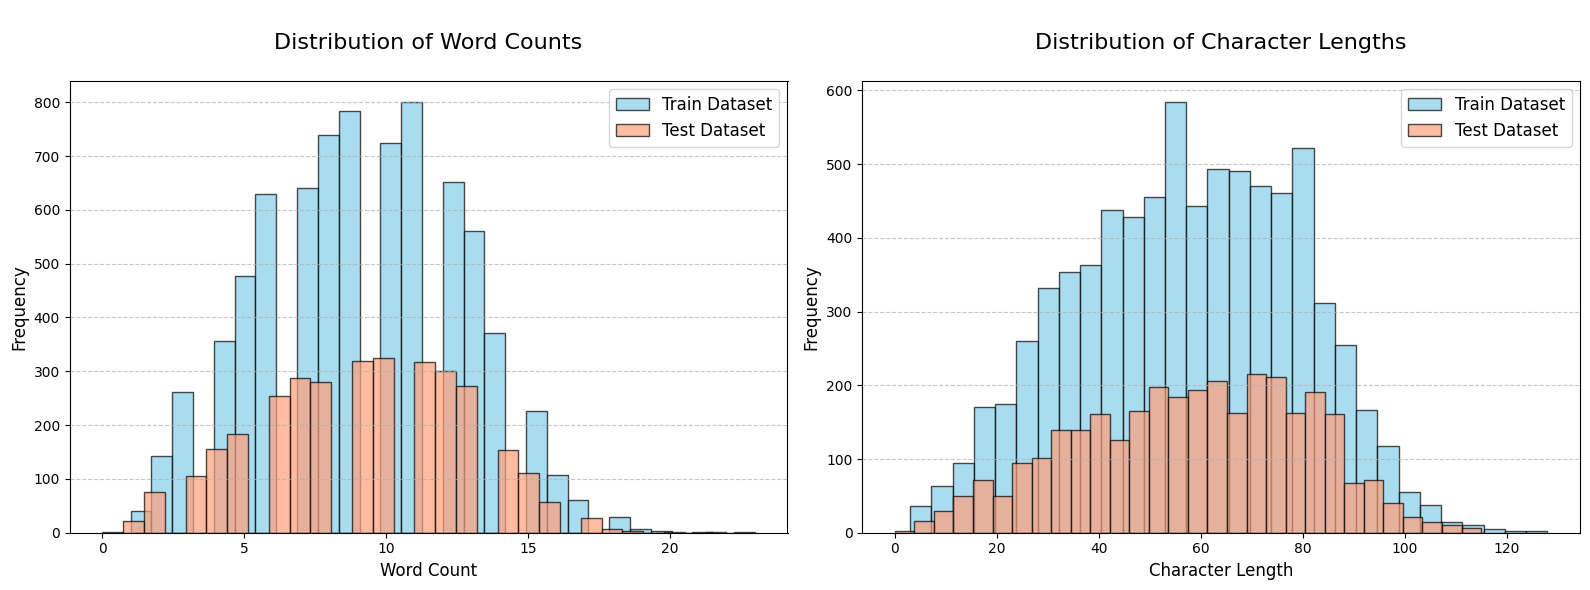

In [11]:
# Calculate tweet lengths based on word count
train['tweet_word_count'] = train['cleaned_text'].apply(lambda x: len(x.split()))
test['tweet_word_count'] = test['cleaned_text'].apply(lambda x: len(x.split()))

# Calculate tweet lengths based on character count
train['tweet_char_count'] = train['cleaned_text'].apply(len)
test['tweet_char_count'] = test['cleaned_text'].apply(len)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot word count distribution
axes[0].hist(
    train['tweet_word_count'], bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Train Dataset'
)
axes[0].hist(
    test['tweet_word_count'], bins=30, color='lightsalmon', edgecolor='black', alpha=0.7, label='Test Dataset'
)
axes[0].set_title('\nDistribution of Word Counts\n', fontsize=16)
axes[0].set_xlabel('Word Count', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].legend(fontsize=12)

# Plot character length distribution
axes[1].hist(
    train['tweet_char_count'], bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Train Dataset'
)
axes[1].hist(
    test['tweet_char_count'], bins=30, color='lightsalmon', edgecolor='black', alpha=0.7, label='Test Dataset'
)
axes[1].set_title('\nDistribution of Character Lengths\n', fontsize=16)
axes[1].set_xlabel('Character Length', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].legend(fontsize=12)

plt.tight_layout()
# plt.savefig('length_distribution.png', dpi=300)
plt.show()

***
- **N-grams Analysis**:

  - **Top 10 Words (1-grams)**:
    - **Disaster Tweets**: Words like "bomb", "kill", "flood", and "disaster" focus on emergencies and crises.
    - **Non-Disaster Tweets**: Words like "like", "im", "new", and "love" reflect casual, conversational topics.<br><br>
      
  - **Top 10 Bi-grams (2-grams)**:
    - **Disaster Tweets**: Phrases like "suicide bomber", "train derail", and "oil spill" describe catastrophic events.
    - **Non-Disaster Tweets**: Phrases like "body bag", "look like", and "YouTube video" indicate personal or everyday discussions.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer


Top 10 Words in Tweets:



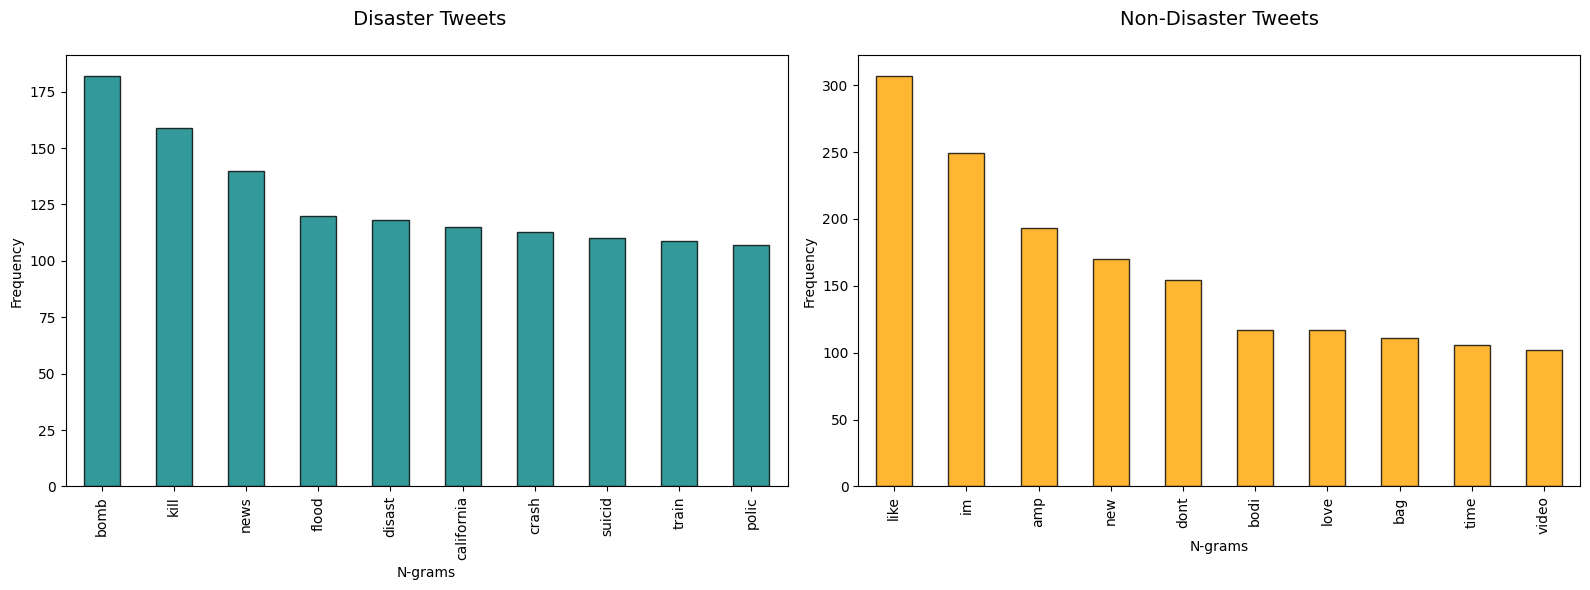


Top 10 Bi-grams in Tweets:



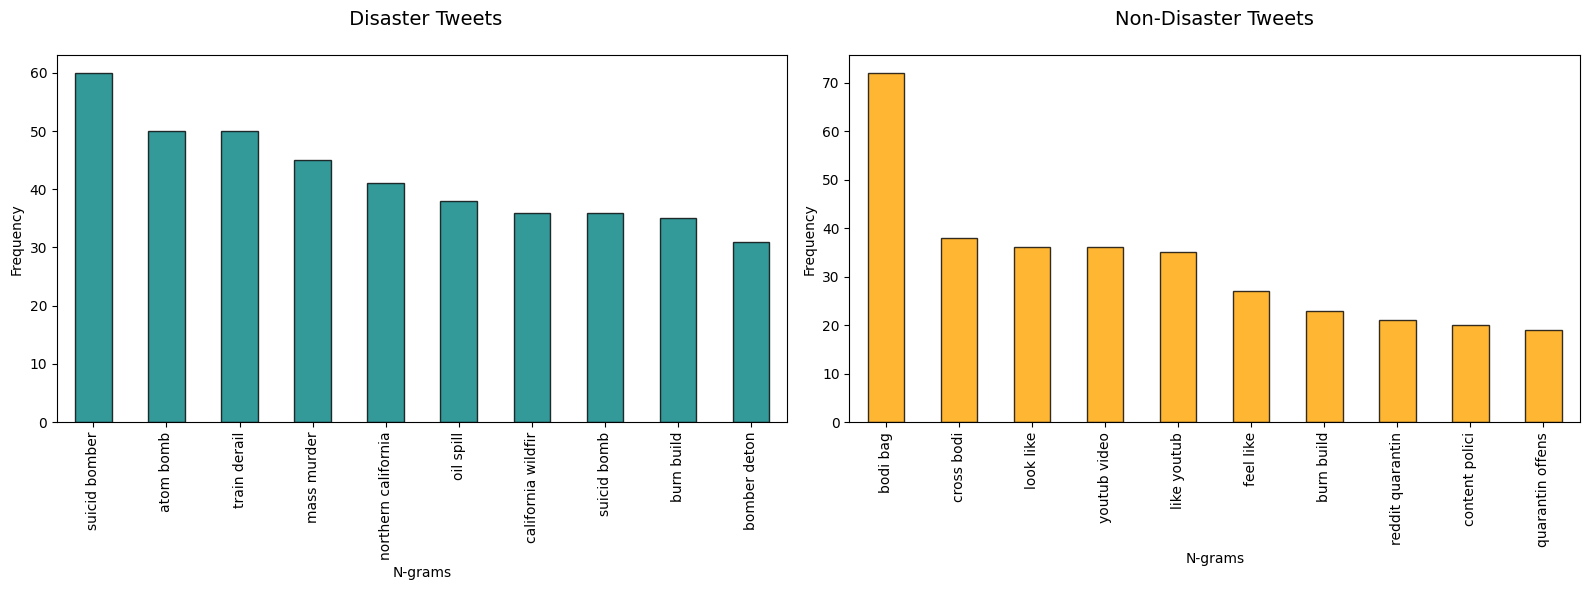

In [13]:
# Define N-grams analysis function
def plot_top_ngrams_side_by_side(corpus1, corpus2, n_gram_range=(1, 1), n=10, title1="Corpus 1", title2="Corpus 2"):
    vectorizer1 = CountVectorizer(ngram_range=n_gram_range, stop_words='english', max_features=n)
    X1 = vectorizer1.fit_transform(corpus1)
    ngram_counts1 = pd.DataFrame(X1.sum(axis=0), columns=vectorizer1.get_feature_names_out()).T
    ngram_counts1.columns = ['count']
    ngram_counts1 = ngram_counts1.sort_values('count', ascending=False).head(n)

    vectorizer2 = CountVectorizer(ngram_range=n_gram_range, stop_words='english', max_features=n)
    X2 = vectorizer2.fit_transform(corpus2)
    ngram_counts2 = pd.DataFrame(X2.sum(axis=0), columns=vectorizer2.get_feature_names_out()).T
    ngram_counts2.columns = ['count']
    ngram_counts2 = ngram_counts2.sort_values('count', ascending=False).head(n)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot N-grams for the first corpus
    ngram_counts1.plot(kind='bar', legend=False, ax=axes[0], color='teal', alpha=0.8, edgecolor='black')
    axes[0].set_title(f' {title1}', fontsize=14)
    axes[0].set_xlabel('N-grams')
    axes[0].set_ylabel('Frequency')

    # Plot N-grams for the second corpus
    ngram_counts2.plot(kind='bar', legend=False, ax=axes[1], color='orange', alpha=0.8, edgecolor='black')
    axes[1].set_title(f'{title2}', fontsize=14)
    axes[1].set_xlabel('N-grams')
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Extract cleaned text based on the target labels
corpus_disaster = train[train['target'] == 1]['cleaned_text']
corpus_non_disaster = train[train['target'] == 0]['cleaned_text']

# Word frequency distribution
print("\nTop 10 Words in Tweets:\n")
plot_top_ngrams_side_by_side(
    corpus_disaster,
    corpus_non_disaster,
    n_gram_range=(1, 1),
    n=10,
    title1="Disaster Tweets\n",
    title2="Non-Disaster Tweets\n"
)

# Bigram frequency distribution
print("\nTop 10 Bi-grams in Tweets:\n")
plot_top_ngrams_side_by_side(
    corpus_disaster,
    corpus_non_disaster,
    n_gram_range=(2, 2),
    n=10,
    title1="Disaster Tweets\n",
    title2="Non-Disaster Tweets\n"
)

***
- **Word Cloud Analysis**:

  - **Disaster Tweets**: Frequent words like "suicide," "bomb," "flood," and "death" reflect emergencies and disasters.
  - **Non-Disaster Tweets**: Words like "love," "want," "time," and "good" indicate casual, everyday topics.

In [14]:
from wordcloud import WordCloud

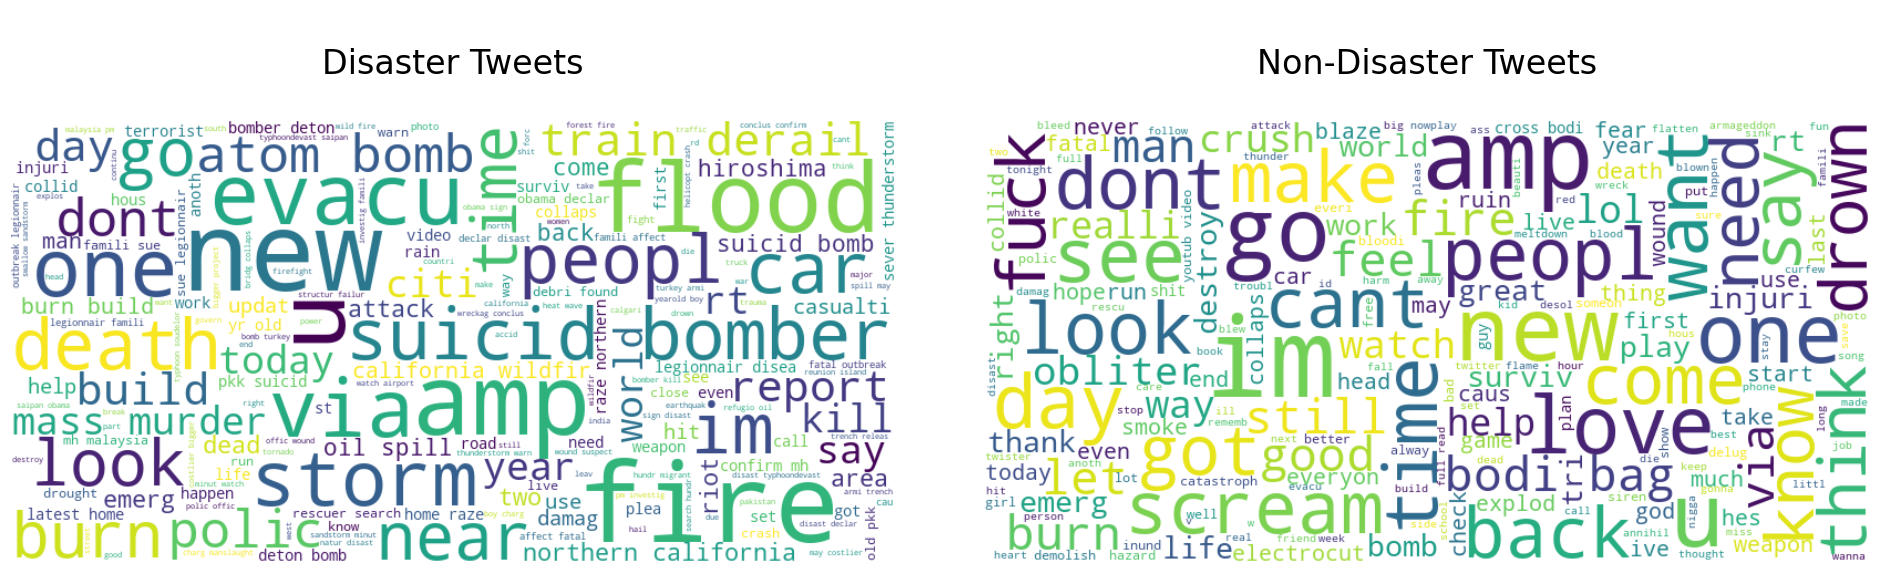

In [15]:
# Generate Word Cloud
def generate_wordcloud_side_by_side(corpus1, title1, corpus2, title2):
    fig, axes = plt.subplots(1, 2, figsize=(24, 12), gridspec_kw={'wspace': 0.1})

    # Word cloud for the first corpus
    wordcloud1 = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate(' '.join(corpus1))
    axes[0].imshow(wordcloud1, interpolation='bilinear')
    axes[0].set_title(title1, fontsize=24)
    axes[0].axis('off')

    # Word cloud for the second corpus
    wordcloud2 = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate(' '.join(corpus2))
    axes[1].imshow(wordcloud2, interpolation='bilinear')
    axes[1].set_title(title2, fontsize=24)
    axes[1].axis('off')

    plt.tight_layout()
    # plt.savefig('word_cloud.png', dpi=300)
    plt.show()

# Extract cleaned text for target=1 and target=0
corpus_disaster = train[train['target'] == 1]['cleaned_text']
corpus_non_disaster = train[train['target'] == 0]['cleaned_text']

# Generate word clouds for disaster tweets and non-disaster tweets
generate_wordcloud_side_by_side(
    corpus_disaster, '\nDisaster Tweets\n',
    corpus_non_disaster, '\nNon-Disaster Tweets\n'
)

***
## **Step 3 Model Architecture**

### **First Model: Word2Vec + BiLSTM**

- **Word2Vec Model**: A Word2Vec model is trained on the dataset using the **Skip-Gram model** (`sg=1`) to generate word embeddings. The Skip-Gram model is chosen because it performs better on smaller datasets and is effective at capturing semantic relationships by predicting the surrounding context of a given word, enabling the model to understand contextual similarities more accurately.
      
- **Bi-LSTM Model**: This model includes an **embedding** layer that loads pre-trained Word2Vec embeddings with fine-tuning capability, followed by a **bidirectional LSTM** to capture contextual information in both forward and backward directions. A **global max pooling** layer extracts the most significant features, while **batch normalization** stabilizes and accelerates training. Fully connected **dense** layers with **ReLU** activation and **dropout** reduce overfitting and add non-linearity.

### **Second Model: Doc2Vec + ANN**

- **Doc2Vec Model**: A Doc2Vec model is trained on the dataset using the **Distributed Bag of Words (DBOW) model** (`dm=0`) to generate document embeddings. The DBOW model is chosen because it focuses on learning document representations by predicting words in the document without considering their order, making it computationally efficient and effective for capturing the overall semantic meaning of a document.

- **ANN Model**: Unlike Bi-LSTM model, which captures sequential dependencies through a bidirectional LSTM, ANN model focuses purely on feature extraction and classification using fully connected dense layers. Similar to Bi-LSTM model, it includes **batch normalization** to stabilize and accelerate training, **dropout** to mitigate overfitting, and **dense** layers with **ReLU** activation to add non-linearity. However, ANN model does not use an embedding layer or sequential processing layers. Instead, it directly processes fixed-size input vectors and refines them through a series of dense layers.


***
#### **3.1 First Model: Word2Vec + BiLSTM**

3.1.1 **Tokenizes Text Data**: Processes each input text with the `spaCy` model, splits it into individual tokens, and removes punctuation and whitespace.

In [16]:
import spacy

In [17]:
# Load English language model
nlp = spacy.load('en_core_web_sm')

# Define tokenization function
def spacy_tokenize(text):
    doc = nlp(text)
    return [token.text for token in doc if not token.is_punct and not token.is_space]

# Tokenize
train_sentences = [spacy_tokenize(text) for text in train['cleaned_text']]
test_sentences = [spacy_tokenize(text) for text in test['cleaned_text']]

In [18]:
# Have a look at the format
print(train_sentences[0])
print(test_sentences[0])

['deed', 'reason', 'earthquak', 'may', 'allah', 'forgiv', 'us']
['happen', 'terribl', 'car', 'crash']


***
3.1.2 **Word2Vec Training**: Trained a `Word2Vec` model using tokenized sentences, generating **200**-dimensional word vectors for **13,697** words.

In [19]:
from gensim.models import Word2Vec

In [30]:
# Train Word2Vec model
vector_size = 200  # Dimension of the embedding vectors
word2vec_model = Word2Vec(
    sentences=train_sentences,  # Training data (tokenized sentences)
    vector_size=vector_size,    # Dimensionality of word vectors
    window=10,                  # Context window size
    min_count=1,                # Minimum word frequency
    sg=1,                       # Skip-Gram model (1 for Skip-Gram, 0 for CBOW)
    epochs=50                   # Number of training epochs
)

In [85]:
# Check vocabulary size and vector dimension
print(f"Vocabulary contains {len(word2vec_model.wv)} words, each with a vector dimension of {vector_size}.")

# Check the first 10 words in the vocabulary
print(f"First 10 words in the vocabulary: {list(word2vec_model.wv.index_to_key[:10])}")

Vocabulary contains 13697 words, each with a vector dimension of 200.
First 10 words in the vocabulary: ['nt', 'like', 'i', 'fire', 'get', 'm', 'amp', 'bomb', 'new', 'via']


In [34]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter

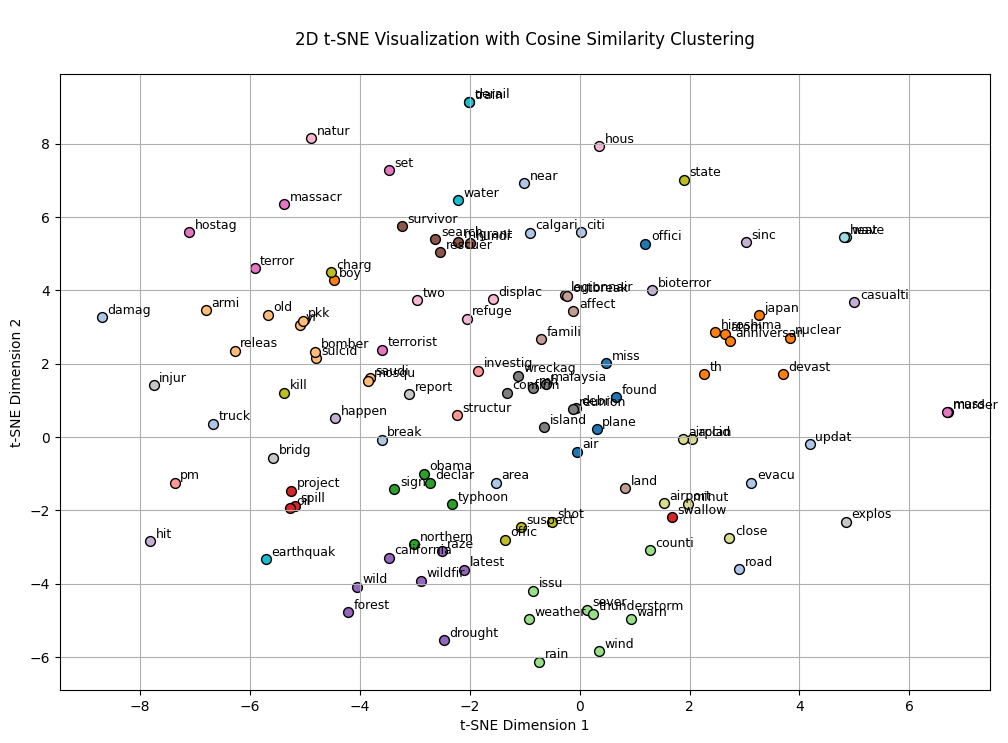

In [74]:
# Extract words
non_disaster_words = [word for tweet in train[train['target'] == 0]['cleaned_text'] for word in spacy_tokenize(tweet)]
disaster_words = [word for tweet in train[train['target'] == 1]['cleaned_text'] for word in spacy_tokenize(tweet)]

# Get sample words
non_disaster_common = [word for word, _ in Counter(non_disaster_words).most_common(200)]
disaster_common = [word for word, _ in Counter(disaster_words).most_common(200)]

# Remove words that appear in Non-Disaster tweets
disaster_unique = [word for word in disaster_common if word not in non_disaster_common]

# Extract word vectors
word_vectors = np.array([word2vec_model.wv[word] for word in disaster_unique if word in word2vec_model.wv])
valid_words = [word for word in disaster_unique if word in word2vec_model.wv]  # Keep track of valid words

# Compute cosine similarity matrix
cosine_sim_matrix = cosine_similarity(word_vectors)

# Apply KMeans clustering using cosine similarity
num_clusters = 20
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(cosine_sim_matrix)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
word_vecs_2d = tsne.fit_transform(word_vectors)

# Plot the t-SNE visualization with clusters
plt.figure(figsize=(12, 8))

# Assign unique colors for each cluster
colors = plt.cm.get_cmap("tab20", num_clusters)

for cluster in range(num_clusters):
    cluster_points = word_vecs_2d[labels == cluster]
    plt.scatter(
        cluster_points[:, 0], cluster_points[:, 1],
        label=f'Cluster {cluster}', color=colors(cluster), s=50, edgecolors='k'
    )

# Annotate points with their corresponding words
for i, word in enumerate(valid_words):
    plt.text(word_vecs_2d[i, 0] + 0.1, word_vecs_2d[i, 1] + 0.1, word, fontsize=9)

plt.title("\n2D t-SNE Visualization with Cosine Similarity Clustering\n", fontsize=12)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()

***
3.1.3 **Initializes Embedding Matrix**: Created an embedding matrix and populated with Word2Vec vectors for words in the tokenizer vocabulary.

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [126]:
# Initialize Tokenizer and fit on training data
tokenizer_vocab_size = len(word2vec_model.wv)
tokenizer = Tokenizer(num_words=tokenizer_vocab_size)
tokenizer.fit_on_texts([' '.join(sentence) for sentence in train_sentences])

# Initialize embedding matrix
embedding_matrix = np.zeros((tokenizer_vocab_size, vector_size))
for word, idx in tokenizer.word_index.items():
    if idx < tokenizer_vocab_size and word in word2vec_model.wv:
        embedding_matrix[idx] = word2vec_model.wv[word]

***
3.1.4 **Data Conversion**: Converted tokenized training and testing datasets into index sequences and padded all sequences to a fixed length of **25**.

In [100]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [131]:
# Check the maximum sentence length
print(f"Maximum sentence length: {np.max([len(sentence) for sentence in train_sentences])}")

Maximum sentence length: 23


In [133]:
# Convert training and testing datasets into index sequences
X_train = tokenizer.texts_to_sequences([' '.join(sentence) for sentence in train_sentences])
X_test = tokenizer.texts_to_sequences([' '.join(sentence) for sentence in test_sentences])

# Pad sequences to a fixed length
max_length = 25
X_train_padded = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test, maxlen=max_length, padding='post')

# Training labels
# train['target']

In [138]:
# Check a sequence from X_train
print("Sample from X_train:")
print(X_train[0])

# Check the same sequence after padding
print("\nSample from X_train_padded:")
print(X_train_padded[0])

Sample from X_train:
[3688, 470, 218, 91, 1378, 2905, 20]

Sample from X_train_padded:
[3688  470  218   91 1378 2905   20    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0]


***
3.1.5 **Model Construction**: Using an embedding layer to load the Word2Vec embedding matrix and building a `BiLSTM` model.

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization, GlobalMaxPooling1D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, RMSprop

In [106]:
# Build the first model
model = Sequential([
    Embedding(input_dim=tokenizer_vocab_size, 
              output_dim=vector_size, 
              input_length=max_length, 
              weights=[embedding_matrix], 
              trainable=True),  # Embedding layer with pre-trained Word2Vec weights

    Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01), recurrent_dropout=0.5)),
    GlobalMaxPooling1D(),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer
])

# Explicitly define the input shape
model.build(input_shape=(None, max_length))

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Display the model structure
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 25, 200)             │       2,739,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 25, 256)             │         336,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 256)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,095,881 (11.81 MB)

 Trainable params: 3,095,369 (11.81 MB)

 Non-trainable params: 512 (2.00 KB)

In [139]:
import visualkeras

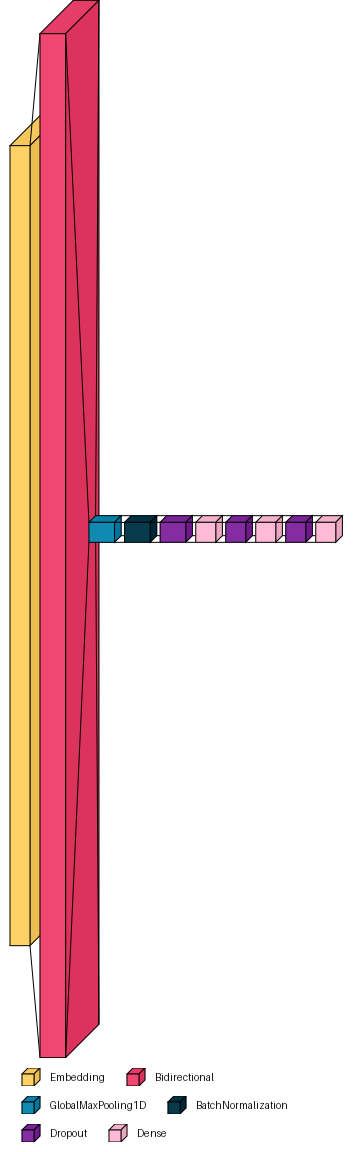

In [143]:
# Generates a layered view
visualkeras.layered_view(model, legend=True)

***
3.1.6 **Model Training**: Trained the `BiLSTM` model.

In [107]:
import time
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split

Epoch 1/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5033 - loss: 8.0344
Epoch 1: val_accuracy improved from -inf to 0.67104, saving model to model_jupyter.keras
191/191 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - accuracy: 0.5034 - loss: 8.0327 - val_accuracy: 0.6710 - val_loss: 6.9076
Epoch 2/30
190/191 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5725 - loss: 6.8812
Epoch 2: val_accuracy improved from 0.67104 to 0.74984, saving model to model_jupyter.keras
191/191 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - accuracy: 0.5727 - loss: 6.8786 - val_accuracy: 0.7498 - val_loss: 5.9729
Epoch 3/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6251 - loss: 5.9466
Epoch 3: val_accuracy improved from 0.74984 to 0.76822, saving model to model_jupyter.keras
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.6251 - loss: 5.9455 - val_accuracy: 0.7682 - val_loss: 5.1550
Epoch 4/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6532 - loss: 5.1452
Epoch 4: val_accuracy 

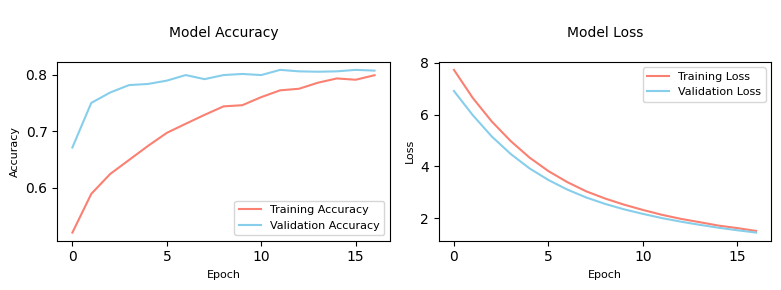

In [108]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_padded, 
    train['target'], 
    test_size=0.2, 
    random_state=42
)

# Set up ModelCheckpoint
checkpoint = ModelCheckpoint(
    filepath='model_jupyter.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1,
    mode='max'
)

# Set up EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

# Start timer
start_time = time.time()

# Start training
history = model.fit(
    X_train, 
    y_train, 
    epochs=30, 
    batch_size=32, 
    validation_data=(X_val, y_val), 
    callbacks=[checkpoint, early_stopping]
)

# End timer
end_time = time.time()
print("-" * 120)
training_time = end_time - start_time  # Calculate training time

# Output training time
print(f"Training time: {training_time:.2f} s")

# Best validation accuracy
print(f"Best Validation Accuracy: {max(history.history['val_accuracy']):.4f}")

def plot_history(history):
    # Plot accuracy
    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='salmon')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='skyblue')
    plt.title('\nModel Accuracy\n', fontsize=10)
    plt.xlabel('Epoch', fontsize=8)
    plt.ylabel('Accuracy', fontsize=8)
    plt.legend(fontsize=8)

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', color='salmon')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='skyblue')
    plt.title('\nModel Loss\n', fontsize=10)
    plt.xlabel('Epoch', fontsize=8)
    plt.ylabel('Loss', fontsize=8)
    plt.legend(fontsize=8)

    plt.tight_layout()
    plt.savefig('model1.png', dpi=300, bbox_inches='tight')
    plt.show()

# Plot training history
plot_history(history)

***
3.1.7 **Submission**: Predicted binary classes on the test set and prepared the results in the required submission format.

In [109]:
# Predict on the test set
pred = model.predict(X_test_padded)

# Convert predictions to binary classes
pred_classes = np.where(pred > 0.5, 1, 0) 

# Create a DataFrame for submission
df_submission = pd.DataFrame({
    'id': test.id,
    'target': pred_classes[:, 0]
})

df_submission.head()

102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


,id,target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1


In [110]:
df_submission.to_csv('submission_Word2Vec.csv', index=False)

***
#### **3.2 Second Model: Doc2Vec + ANN**

3.2.1 **Preparing Tagged Documents**: Converting tokenized sentences into tagged documents for Doc2Vec processing.

In [111]:
from gensim.models.doc2vec import TaggedDocument

In [153]:
# Create tagged documents for Doc2Vec
train_tagged = [TaggedDocument(words=doc, tags=[i]) for i, doc in enumerate(train_sentences)]

# Have a look at the format
train_tagged[:5]

[TaggedDocument(words=['deed', 'reason', 'earthquak', 'may', 'allah', 'forgiv', 'us'], tags=[0]),
 TaggedDocument(words=['forest', 'fire', 'near', 'la', 'rong', 'sask', 'canada'], tags=[1]),
 TaggedDocument(words=['resid', 'ask', 'shelter', 'place', 'notifi', 'offic', 'evacu', 'shelter', 'place', 'order', 'expect'], tags=[2]),
 TaggedDocument(words=['peopl', 'receiv', 'wildfir', 'evacu', 'order', 'california'], tags=[3]),
 TaggedDocument(words=['got', 'sent', 'photo', 'rubi', 'alaska', 'smoke', 'wildfir', 'pour', 'school'], tags=[4])]

***
3.2.2 **Doc2Vec Training**: Trained a `Doc2Vec` model using the tagged documents, generating vector representations for words and documents.

In [114]:
from gensim.models import Doc2Vec

In [154]:
# Train Doc2Vec model
doc2vec_model = Doc2Vec(train_tagged,
    vector_size=200,
    window=10,
    min_count=1,
    dm=0,             # Use the Distributed Bag of Words (DBOW) model
    epochs=50       
)

# Check the size of the vocabulary
print("Vocabulary size:", len(doc2vec_model.wv.key_to_index))

Vocabulary size: 13697


***
3.2.3 **Generating Document Vectors**: Inferred vector representations for documents in the training and testing sets using the trained Doc2Vec model.

In [155]:
# Extract document vectors for the training set
train_vec = np.array([doc2vec_model.infer_vector(doc, epochs=20) for doc in train_sentences])

# Extract document vectors for the testing set
test_vec = np.array([doc2vec_model.infer_vector(doc, epochs=20) for doc in test_sentences])

# Check the shape of the training and testing document vectors
print(f"train_vec shape: {train_vec.shape}")
print(f"train_vec shape: {test_vec.shape}")

train_vec shape: (7613, 200)
train_vec shape: (3263, 200)


In [158]:
# Choose a sample document
print("Sample document:", train_tagged[1].words)

# Find the top 5 most similar documents to the sample document
similar_docs = doc2vec_model.dv.most_similar(1, topn=5)

# Check the content and similarity of the most similar documents
print("\nMost similar documents to the sample document:\n")
for tag, similarity in similar_docs:
    doc_index = int(tag)
    print(f"Document Index: {doc_index}, Similarity: {similarity:.4f}")
    print(f"Document Content: {' '.join(train_tagged[doc_index].words)}")
    print("-" * 50)

Sample document: ['forest', 'fire', 'near', 'la', 'rong', 'sask', 'canada']

Most similar documents to the sample document:

Document Index: 4061, Similarity: 0.9919
Document Content: pharrel prevent forest fire
--------------------------------------------------
Document Index: 4020, Similarity: 0.9912
Document Content: e particulatebreak solid combust fossil fuel voltaic activ forest fire biolog vocpetroleum ch bacteria decomposit
--------------------------------------------------
Document Index: 4045, Similarity: 0.9912
Document Content: nycdivorcelaw trump climat denier alga bloom pacif calif alska seewe caribean forest fire snowbal inhof
--------------------------------------------------
Document Index: 4024, Similarity: 0.9908
Document Content: littl forest fire warden
--------------------------------------------------
Document Index: 7313, Similarity: 0.9907
Document Content: wild fire west crazi
--------------------------------------------------


***
3.2.4 **Model Construction**: Built a feedforward neural network (`ANN`) for binary classification.

In [122]:
# Build the second model
model2 = Sequential([
    Dense(128, activation='relu', input_dim=vector_size, kernel_regularizer=l2(0.01)),  # First fully connected layer
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),  # Second fully connected layer
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),  # Third fully connected layer
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model2.compile(optimizer=RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Display the model structure
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │          25,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,865 (144.00 KB)

 Trainable params: 36,481 (142.50 KB)

 Non-trainable params: 384 (1.50 KB)

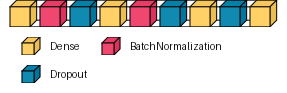

In [149]:
# Generates a layered view
visualkeras.layered_view(model2, legend=True)

***
3.2.5 **Model Training**: Use the extracted document vectors as features to train the `ANN` model.

In [120]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_vec, train['target'].values, test_size=0.2, random_state=42)

Epoch 1/30
151/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4954 - loss: 3.8257
Epoch 1: val_accuracy improved from -inf to 0.57781, saving model to model2_jupyter.keras
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4971 - loss: 3.8066 - val_accuracy: 0.5778 - val_loss: 3.3174
Epoch 2/30
171/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5526 - loss: 3.4982
Epoch 2: val_accuracy improved from 0.57781 to 0.64741, saving model to model2_jupyter.keras
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5536 - loss: 3.4904 - val_accuracy: 0.6474 - val_loss: 3.1097
Epoch 3/30
183/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5574 - loss: 3.2618
Epoch 3: val_accuracy improved from 0.64741 to 0.70781, saving model to model2_jupyter.keras
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5586 - loss: 3.2584 - val_accuracy: 0.7078 - val_loss: 2.8968
Epoch 4/30
174/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5897 - loss: 3.0482
Epoch 4: val_accuracy improve

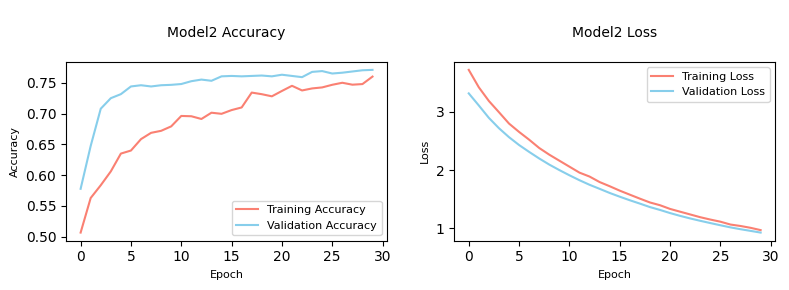

In [123]:
# Set up ModelCheckpoint
checkpoint = ModelCheckpoint(
    filepath='model2_jupyter.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1,
    mode='max'
)

# Set up EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

# Start timer
start_time = time.time()

# Start training
history2 = model2.fit(
    X_train, 
    y_train, 
    validation_data=(X_val, y_val), 
    epochs=30, 
    batch_size=32, 
    callbacks=[checkpoint, early_stopping]
)

# End timer
end_time = time.time()
print("-" * 120)
training_time = end_time - start_time  # Calculate training time

# Output training time
print(f"Training time: {training_time:.2f} s")

# Best validation accuracy
print(f"Best Validation Accuracy: {max(history2.history['val_accuracy']):.4f}")

def plot_history(history):
    # Plot accuracy
    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    plt.plot(history2.history['accuracy'], label='Training Accuracy', color='salmon')
    plt.plot(history2.history['val_accuracy'], label='Validation Accuracy', color='skyblue')
    plt.title('\nModel2 Accuracy\n', fontsize=10)
    plt.xlabel('Epoch', fontsize=8)
    plt.ylabel('Accuracy', fontsize=8)
    plt.legend(fontsize=8)

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history2.history['loss'], label='Training Loss', color='salmon')
    plt.plot(history2.history['val_loss'], label='Validation Loss', color='skyblue')
    plt.title('\nModel2 Loss\n', fontsize=10)
    plt.xlabel('Epoch', fontsize=8)
    plt.ylabel('Loss', fontsize=8)
    plt.legend(fontsize=8)

    plt.tight_layout()
    plt.savefig('model2.png', dpi=300, bbox_inches='tight')
    plt.show()

# Plot training history
plot_history(history2)

***
3.1.6 **Submission**: Predicted binary classes on the test set and prepared the results in the required submission format.

In [124]:
# Predict on the test set
pred2 = model2.predict(test_vec)

# Convert predictions to binary classes
pred2_classes = np.where(pred2 > 0.5, 1, 0)

# Create a DataFrame for submission
df_submission2 = pd.DataFrame({
    'id': test.id,
    'target': pred2_classes[:, 0]
})

df_submission2.head()

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,id,target
0,0,0
1,2,0
2,3,1
3,9,1
4,11,1


In [125]:
df_submission2.to_csv('submission_Doc2Vec.csv', index=False)

***
## **Step 4 Results and Analysis**

#### **4.1 Visualization Analysis**

- **Model 1 (Word2Vec + BiLSTM)**:
  
    - **Accuracy Plot**: The training accuracy steadily increased as the model learned from the dataset, reaching a final value of **79.22%**. The validation accuracy remained relatively stable, peaking at **80.83%**, before showing minor fluctuations. This stability suggests that the model successfully generalized to unseen data without significant overfitting.
      
    - **Loss Plot**: The training loss decreased consistently, reflecting the model's improving ability to fit the data. The validation loss followed a similar trend initially, but eventually plateaued, indicating that the model reached its optimal performance early on. The results suggest a well-converged and stable training process.
      
    - **Summary**: The stability of both accuracy and loss trends indicates effective regularization techniques (e.g., dropout and L2 regularization). However, the relatively high loss at the end suggests potential room for improvement in handling the complexity of the data, such as exploring different hyperparameters or architectures.
 
- **Model 2 (Doc2Vec + ANN)**:
 
    - **Accuracy Plot**: The training accuracy steadily increased, reaching a final value of **76.59%**. The validation accuracy showed consistent improvement throughout training, peaking at a best value of **77.08%** in the final epoch. The consistent upward trend indicates that the model generalized well to the validation set, with minimal overfitting.

    - **Loss Plot**: The training loss decreased steadily, reaching **0.9673** at the final epoch. The validation loss followed a similar downward trend, stabilizing at **0.9292**. The close alignment of the training and validation loss curves suggests that the model maintained a balance between fitting the training data and generalizing to unseen data.
      
    - **Summary**: The Distributed Bag of Words (DBOW) model for Doc2Vec effectively captured document-level embeddings, while the fully connected layers in the ANN performed well in classification. This model could potentially benefit from hyperparameter tuning, such as adjusting the learning rate or increasing the number of neurons in the dense layers, to further improve performance.

![Alt Text](model1.png)
![Alt Text](model2.png)

***
#### **4.2 Key Observations**

- **Parameters**: Model 1 has significantly more parameters (**3.1M**) compared to Model 2 (**36K**). This is expected due to the complexity of the BiLSTM architecture, which requires more parameters to capture sequential dependencies.

- **Training Time**: Model 1 required a much longer training time (**219 seconds**) compared to Model 2 (**15 seconds**). The simpler structure of the ANN and the fixed-length document embeddings generated by Doc2Vec contributed to its faster training time.

- **Validation Accuracy**: Model 1 achieved a higher validation accuracy (**80.83%**) than Model 2 (**77.08%**). This suggests that the BiLSTM architecture is better suited for capturing contextual relationships in the data.
    
- **Kaggle Score**: Model 1 also outperformed Model 2 on the test set, achieving a higher score (**0.79405** vs. **0.75084**). This reflects the BiLSTM model's superior ability to generalize to unseen data.

![Alt Text](score.jpg)

In [196]:
# Define the data
embedding_model = ['Word2Vec', 'Doc2Vec']
neural_network_model = ['BiLSTM', 'ANN']
parameters = ['3.1 M (11.81 MB)', '36 K (2.34 MB)']
train_time = ['219 s', '15 s']
val_acc = [0.8083, 0.7708]
kaggle_score = [0.79405, 0.75084]

# Create DataFrame
comparison_df = pd.DataFrame({
    'Embedding': embedding_model,
    'Model': neural_network_model,
    'Parameters': parameters,
    'Training time': train_time,
    'Validation accuracy': val_acc,
    'Kaggle score': kaggle_score
})

# Highlight cells
def highlight_cells(val):
    highlight_values = ['36 K (2.34 MB)', '15 s', 0.8083, 0.79405]
    return 'background-color: lightgreen' if val in highlight_values else ''

# Style the DataFrames
styled_df = comparison_df.style.format(
    {'Validation accuracy': '{:.4f}', 'Kaggle score': '{:.5f}'}
).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]},
     {'selector': 'td', 'props': [('text-align', 'center')]}]
).applymap(highlight_cells)

styled_df

,Embedding,Model,Parameters,Training time,Validation accuracy,Kaggle score
0,Word2Vec,BiLSTM,3.1 M (11.81 MB),219 s,0.8083,0.79405
1,Doc2Vec,ANN,36 K (2.34 MB),15 s,0.7708,0.75084


***
## **Step 5 Conclusion**

#### **5.1 Takeaways**

- **Sequential Nature of Tweets**: The primary reason Model 1 outperformed Model 2 is that tweets are short, sequential text data. BiLSTM can effectively capture this sequential information, while Doc2Vec generates embeddings that may lose context critical to understanding tweets.

- **Preprocessing and Data Cleaning**: While both models rely on good preprocessing, Doc2Vec embeddings may not have been as effective for representing short and context-dependent text.

- **Model Complexity**: Model 1's higher parameter count and the sequential processing capability of BiLSTM gave it an advantage in extracting meaningful patterns.

#### **5.2 Improvements**

- **What Helped**: Pre-trained **Word2Vec** embeddings and the **Bi-LSTM architecture** effectively captured semantic and sequential relationships in tweets, leading to superior performance. **Regularization techniques** like dropout and L2 further ensured stable training and better generalization.


- **What Did Not Help**: **Doc2Vec**'s document-level embeddings and the **simpler ANN architecture**, while computationally efficient, struggled to capture the short and context-dependent nature of tweets, with performance further constrained by the relatively small dataset size.


- **Suggestions for Improvement**: To improve Model 2, consider hyperparameter tuning for Doc2Vec (e.g., enabling `dm=1`), adding features like sentiment scores or metadata. For preprocessing, enhance text cleaning, ensure consistent tokenization, and enrich short tweets with related information. Additionally, increasing dataset size or using pretrained embeddings can provide richer input representations for better performance.

In summary, this project explored two distinct approaches—Word2Vec + BiLSTM and Doc2Vec + ANN—for text classification on a tweet dataset. The Word2Vec + BiLSTM model outperformed the Doc2Vec + ANN model in both validation accuracy and Kaggle score due to its ability to capture sequential dependencies and contextual relationships within the tweets. However, this came at the cost of increased training time and computational complexity. The Doc2Vec + ANN model, while faster and more resource-efficient, struggled with the dataset's sequential nature and short text length, highlighting the limitations of document-level embeddings for tweets.

Overall, the project demonstrates the importance of aligning model architecture with the characteristics of the data. Future improvements could focus on exploring hybrid models, enhancing preprocessing techniques, and leveraging larger datasets or pretrained embeddings for better performance and generalization.

**GitHub Repository Link**

https://github.com/d93xup60126/NLP_Disaster_Tweets
***